In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [9]:
# Load the data (use delim_whitespace=True)
df = pd.read_table('http://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)
# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [13]:
# Apply value_counts() to series for "sx", "dg", and "rk"
df['sx'].value_counts()


male      38
female    14
Name: sx, dtype: int64

In [14]:
df['dg'].value_counts()


doctorate    34
masters      18
Name: dg, dtype: int64

In [15]:
df['rk'].value_counts()

full         20
assistant    18
associate    14
Name: rk, dtype: int64

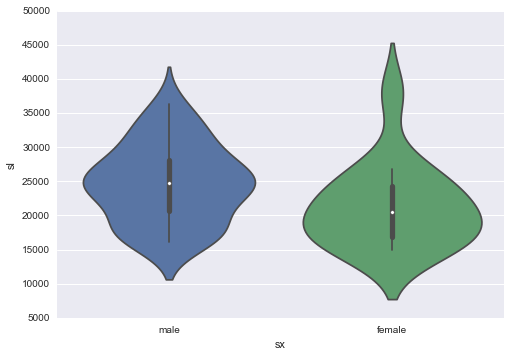

In [16]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

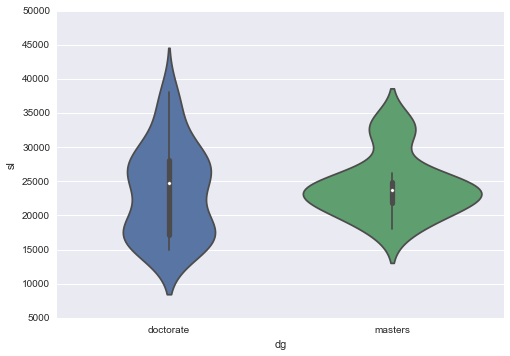

In [17]:
# Do the same for "dg" and "rk"
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

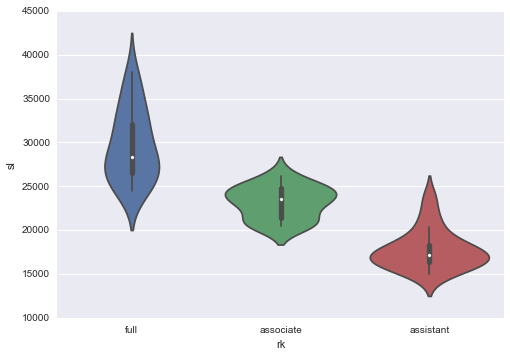

In [18]:
sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [19]:

## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [28]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", lm.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample with regularization:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", lm.score(X, y)

# Did the results improve?

Sample: 0.951106969587
All data with sample model: -1.38158210313
Sample with regularization: 0.925035358185
All data with regularization model: 0.4707591567


##### I'm not sure if the results improved. The sample seems to get larger with each run, while the regularization value increased.

In [31]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample:", lm.score(X, y)

# Apply to the whole data set


print "All data with sample model:", lm.score(X, y)

# Repeat with regularization


lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample with regularization:", lm.score(X, y)

# Apply to the whole data set


print "All data with regularization model:", lm.score(X, y)

## Plot the data
## and print the model score

# Apply the same model to the women and compare the model score

 Sample: 0.88630543814
All data with sample model: 0.88630543814
Sample with regularization: 0.886199410543
All data with regularization model: 0.886199410543


In [33]:
mask = (df["dg"] == "doctorate")